### Importing VGGNet

In [36]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from PIL import Image

In [24]:
# Load VGG16 model
vgg16 = models.vgg16(pretrained=True).features  # Only feature extractor part
vgg16.eval()

c:\Users\lenovo\anaconda3\envs\torchenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\lenovo\anaconda3\envs\torchenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [25]:
# Define layers to visualize
layer_names = ["3", "8", "15", "22", "29"]  # Example: conv1_2, conv2_2, conv3_3, conv4_3, conv5_3
feature_maps = {}

In [ ]:
# Hook function to store feature maps
def hook_fn(module, input, output, layer_name):
    feature_maps[layer_name] = output

In [27]:
# Register hooks to extract feature maps
for name, layer in vgg16.named_children():
    if name in layer_names:
        layer.register_forward_hook(lambda m, i, o, name=name: hook_fn(m, i, o, name))

In [28]:
# Preprocessing pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [32]:
# Load image and preprocess
image_path = "Images\\dog image.jpg"  # Replace with your image
image = Image.open(image_path)
image = transform(image).unsqueeze(0)  # Add batch dimension

In [33]:
# Forward pass to get feature maps
with torch.no_grad():
    _ = vgg16(image)

# Function to display feature maps
def display_feature_maps(feature_maps, num_maps=6):
    for layer, fmap in feature_maps.items():
        fmap = fmap.squeeze(0)  # Remove batch dimension (Shape: [Channels, H, W])
        num_channels = fmap.shape[0]
        
        fig, axes = plt.subplots(1, num_maps, figsize=(15, 5))  # Display 'num_maps' feature maps
        fig.suptitle(f"Feature Maps from Layer {layer}")

        for i in range(num_maps):
            if i >= num_channels:  # Prevent index error if layer has fewer channels
                break
            img = fmap[i].cpu().numpy()  # Convert to NumPy
            img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0,1]
            axes[i].imshow(img, cmap="viridis")
            axes[i].axis("off")

        plt.show()

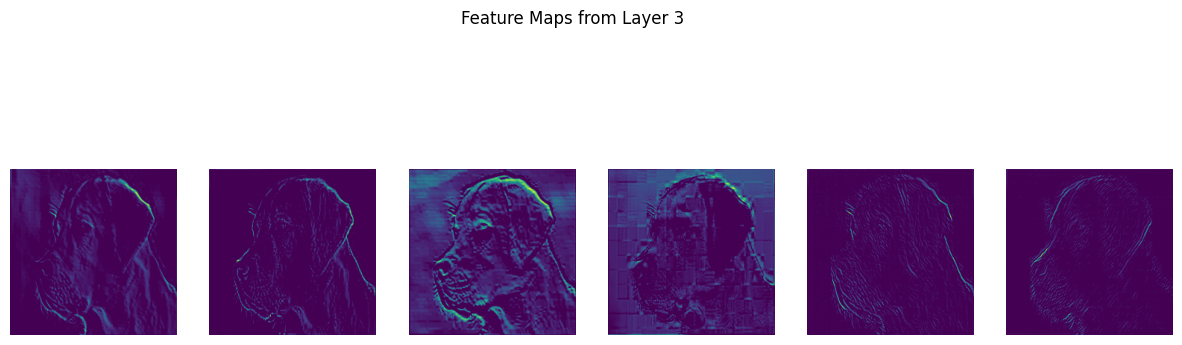

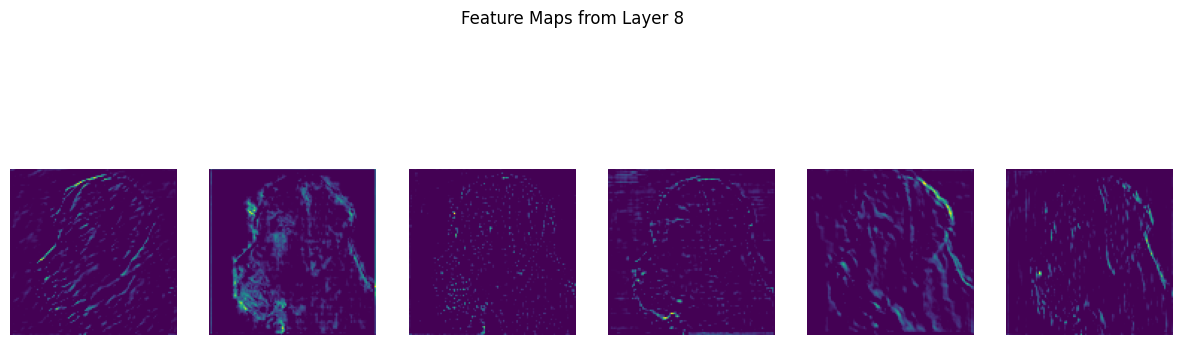

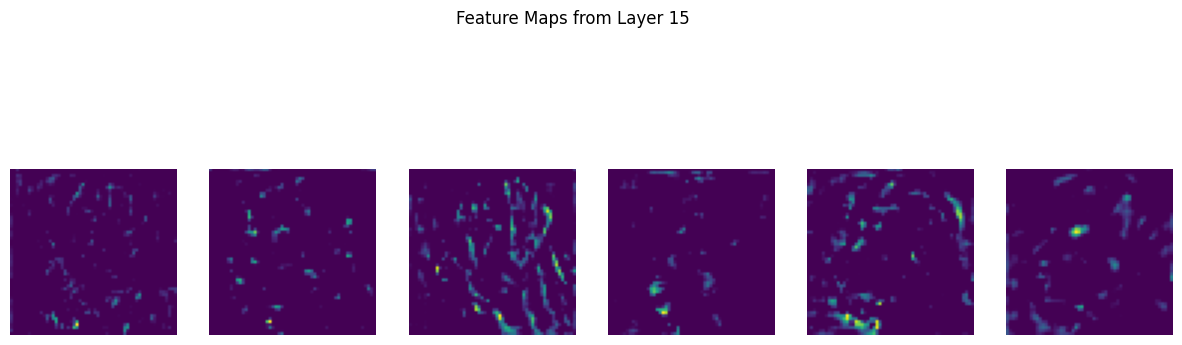

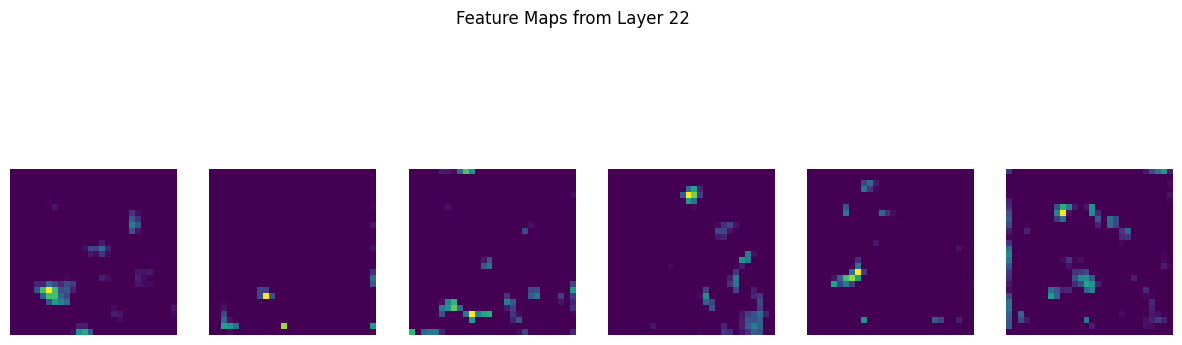

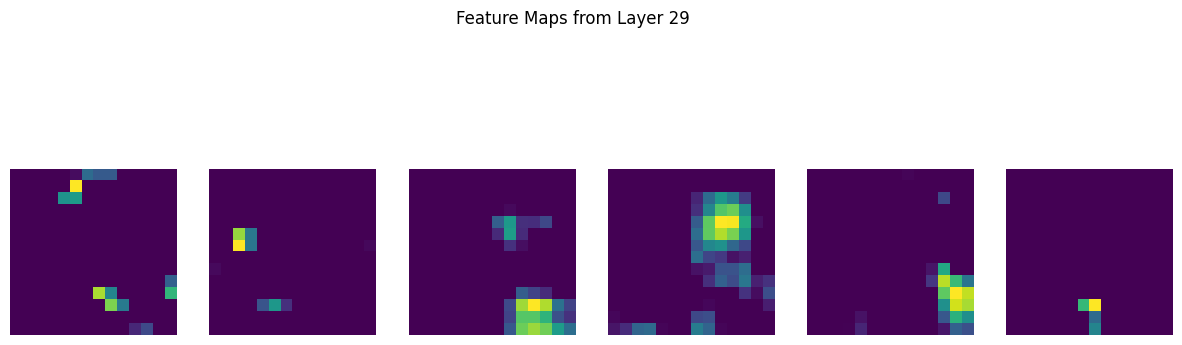

In [34]:
# Display feature maps from each selected layer
display_feature_maps(feature_maps)